In [ ]:
from pymatgen.core.structure import Structure
from gridrdf.extendRDF import find_all_neighbours
import numpy as np
import matplotlib.pyplot as plt
import warnings
from gridrdf.extendRDF import calculate_rdf
from gridrdf.earth_mover_distance import super_fast_EMD_matrix
import tqdm

/Users/siddnathan/miniconda3/envs/gridrdf_env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<p><strong>GRID/EMD overview:</strong> We characterize structural (dis)similarities using the GRID representation and Earth Mover’s Distance (EMD); see Zhang et al., <em>Digital Discovery</em> <strong>2</strong>, 81 (2023).</p>

<p><strong>Procedure for computing GRID:</strong></p>
<ol>
  <li>For each atom in the unit cell, compute all pairwise distances up to a chosen cutoff (10 Å in this work), including periodic boundary conditions.</li>
  <li>Sort these distances in ascending order to create an atom-specific list $d_j = (d_{1j}, d_{2j}, \ldots, d_{ij}, \ldots)$, where the $i$th entry maps to the $i$th GRID group.</li>
  <li>Bin the distances into histograms for each group and apply Gaussian kernel density estimation to smooth the distributions and avoid bin-edge discontinuities.</li>
</ol>

<p><strong>EMD metric for FeOF SRO:</strong> EMD offers a robust measure of structural (dis)similarity among FeOF short-range ordered configurations. Intuitively, it is the minimum “work” required to morph one distribution into another—here, transforming the structural distribution (defined by Wyckoff site arrangements) of one configuration into that of another. This enables detailed comparison of O/F ordering by quantifying the cost of converting between coordination environments, especially across extended length scales such as the (110) planes. For each pair of structures, we compute EMD between corresponding ($i$th–$i$th) GRID distributions across the first 100 GRID groups and take the mean over these groups, following the procedure outlined in Zhang et al., <em>Digital Discovery</em> <strong>2</strong>, 81 (2023). This converts subtle variations in O/F placement and coordination environments into a measurable quantity that clarifies how anion arrangements influence plane-to-plane correlations in closely related structures. The difference in EMD between pairs of structures before and after relaxation shows the variation in O/F correlations across (110) planes.</p>

<h3>EMD comparison between GRID reps of unrelaxed FeOF candidate structures </h3>

/var/folders/9m/htyc98zs1y57291167g09k3h0000gn/T/ipykernel_21731/3007572920.py:12: UserWarning: The estimated cutoff distances range from 7.28 to 7.28 Angstroms
  neighbours, cutoffs = find_all_neighbours(dummy_structures,num_neighbours=100,cutoff=None,return_limits=True,dryrun=False)
100%|██████████| 4/4 [00:00<00:00, 183.64it/s]
/var/folders/9m/htyc98zs1y57291167g09k3h0000gn/T/ipykernel_21731/3007572920.py:12: UserWarning: Computed cutoff ranges from 6.9145 to 6.9145.
  neighbours, cutoffs = find_all_neighbours(dummy_structures,num_neighbours=100,cutoff=None,return_limits=True,dryrun=False)


[[[PeriodicNeighbor: F (-1.413, -1.413, 0.0) [0.0, -0.301, -0.301], PeriodicNeighbor: O (1.413, 1.413, 0.0) [0.0, 0.301, 0.301], PeriodicNeighbor: F (-0.9342, 0.9342, 1.655) [0.5, -0.199, 0.199], PeriodicNeighbor: O (0.9342, -0.9342, 1.655) [0.5, 0.199, -0.199], PeriodicNeighbor: F (-0.9342, 0.9342, -1.655) [-0.5, -0.199, 0.199], PeriodicNeighbor: O (0.9342, -0.9342, -1.655) [-0.5, 0.199, -0.199], PeriodicNeighbor: Fe (0.0, 0.0, -3.31) [-1.0, 0.0, 0.0], PeriodicNeighbor: Fe (0.0, 0.0, 3.31) [1.0, 0.0, 0.0], PeriodicNeighbor: F (-1.413, 3.281, 0.0) [0.0, -0.301, 0.699], PeriodicNeighbor: O (-3.281, 1.413, 0.0) [0.0, -0.699, 0.301], PeriodicNeighbor: F (3.281, -1.413, 0.0) [0.0, 0.699, -0.301], PeriodicNeighbor: O (1.413, -3.281, 0.0) [0.0, 0.301, -0.699], PeriodicNeighbor: Fe (2.347, 2.347, 1.655) [0.5, 0.5, 0.5], PeriodicNeighbor: Fe (2.347, -2.347, 1.655) [0.5, 0.5, -0.5], PeriodicNeighbor: Fe (2.347, 2.347, -1.655) [-0.5, 0.5, 0.5], PeriodicNeighbor: Fe (-2.347, 2.347, 1.655) [0.5, -

100%|██████████| 4/4 [00:00<00:00, 2333.73it/s]


[[0.00000000e+00 7.33296065e-16 7.33296065e-16 1.11430297e-15]
 [7.33296065e-16 0.00000000e+00 0.00000000e+00 1.02749607e-15]
 [7.33296065e-16 0.00000000e+00 0.00000000e+00 1.02749607e-15]
 [1.11430297e-15 1.02749607e-15 1.02749607e-15 0.00000000e+00]]


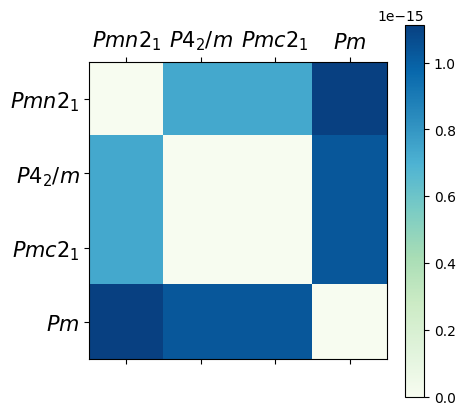

In [ ]:
#Compare with unrelaxed

structures = ['./FeOF_gs_unrelaxed_structs/POSCAR_Pmn21_orig.vasp', './FeOF_gs_unrelaxed_structs/POSCAR_Pmc21_orig.vasp', './FeOF_gs_unrelaxed_structs/POSCAR_P42_m_orig.vasp', './FeOF_gs_unrelaxed_structs/POSCAR_Pm_orig.vasp']
spcgps = ['Pmn21', 'P42_m', 'Pmc21', 'Pm']
#struct_list = [struct_1, struct_2, struct_3, struct_4]
maximum_grid_distance =10
candidate_structures = []
grid_representations = []
for struct in structures:
    candidate_structures.append(Structure.from_file(struct))

neighbours, cutoffs = find_all_neighbours(candidate_structures,num_neighbours=100,cutoff=None,return_limits=True,dryrun=False)
print(neighbours)

max_dist = max(maximum_grid_distance, np.round(cutoffs[1], 1))
if max_dist != maximum_grid_distance:
    print(f"Maximum distance has been updated to {max_dist} to account for 100 neighbours")

for i, struct in tqdm.tqdm(enumerate(candidate_structures), total=len(candidate_structures)):
    grid_representations.append(calculate_rdf(struct, neighbours[i], max_dist=max_dist, bin_width=0.1, smearing=0.1, normed=True,return_sparse=False, broadening_method='kde',rdf_type='grid'))


mat = super_fast_EMD_matrix(grid_representations, bin_width=0.1)
print(mat)

plt.matshow(mat, cmap='GnBu')
plt.colorbar()
plt.xticks(ticks=[0, 1, 2, 3], labels=[r"$\mathit{Pmn2_{1}}$", r"$\mathit{P4_{2}/m}$", r"$\mathit{Pmc2_{1}}$", r"$\mathit{Pm}$"], fontsize=15)
plt.yticks(ticks=[0, 1, 2, 3], labels=[r"$\mathit{Pmn2_{1}}$", r"$\mathit{P4_{2}/m}$", r"$\mathit{Pmc2_{1}}$", r"$\mathit{Pm}$"], fontsize=15)
plt.savefig('emd_before.pdf', bbox_inches='tight')
plt.show()

<h3>EMD comparison between GRID reps of relaxed FeOF candidate structures</h3>

/var/folders/9m/htyc98zs1y57291167g09k3h0000gn/T/ipykernel_21731/147864986.py:10: UserWarning: The estimated cutoff distances range from 6.93 to 6.95 Angstroms
  neighbours, cutoffs = find_all_neighbours(dummy_structures,num_neighbours=100,cutoff=None,return_limits=True,dryrun=False)
100%|██████████| 4/4 [00:00<00:00, 224.52it/s]
/var/folders/9m/htyc98zs1y57291167g09k3h0000gn/T/ipykernel_21731/147864986.py:10: UserWarning: Computed cutoff ranges from 6.5075 to 6.5134.
  neighbours, cutoffs = find_all_neighbours(dummy_structures,num_neighbours=100,cutoff=None,return_limits=True,dryrun=False)
100%|██████████| 4/4 [00:00<00:00, 3230.74it/s]


[[0.         0.02457746 0.01490432 0.01168691]
 [0.02457746 0.         0.01600523 0.0156104 ]
 [0.01490432 0.01600523 0.         0.00483723]
 [0.01168691 0.0156104  0.00483723 0.        ]]


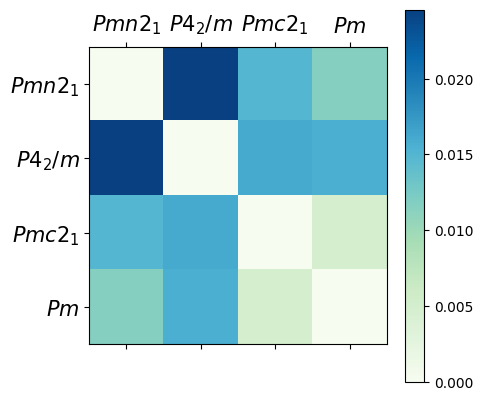

In [ ]:
structures = ['./FeOF_gs_relaxed_structs/POSCAR_Pmn21_correct_bs.vasp', './FeOF_gs_relaxed_structs/POSCAR_P42_m_correct_bs.vasp', './FeOF_gs_relaxed_structs/POSCAR_Pmc21_correct_bs.vasp', './FeOF_gs_relaxed_structs/POSCAR_Pm_correct_bs.vasp']
spcgps = ['Pmn21', 'P42_m', 'Pmc21', 'Pm']
#struct_list = [struct_1, struct_2, struct_3, struct_4]
maximum_grid_distance =10
candidate_structures = []
grid_representations = []
for struct in structures:
    candidate_structures.append(Structure.from_file(struct))

neighbours, cutoffs = find_all_neighbours(candidate_structures,num_neighbours=100,cutoff=None,return_limits=True,dryrun=False)
#print(neighbours)

max_dist = max(maximum_grid_distance, np.round(cutoffs[1], 1))
if max_dist != maximum_grid_distance:
    print(f"Maximum distance has been updated to {max_dist} to account for 20 neighbours")

for i, struct in tqdm.tqdm(enumerate(candidate_structures), total=len(candidate_structures)):
    grid_representations.append(calculate_rdf(struct, neighbours[i], max_dist=max_dist, bin_width=0.1, smearing=0.1, normed=True,return_sparse=False, broadening_method='kde',rdf_type='grid'))


mat = super_fast_EMD_matrix(grid_representations, bin_width=0.1)
print(mat)

plt.matshow(mat, cmap='GnBu',vmax=max(mat.flatten()))
plt.colorbar()
plt.xticks(ticks=[0, 1, 2, 3], labels=[r"$\mathit{Pmn2_{1}}$", r"$\mathit{P4_{2}/m}$", r"$\mathit{Pmc2_{1}}$", r"$\mathit{Pm}$"], fontsize=15)
plt.yticks(ticks=[0, 1, 2, 3], labels=[r"$\mathit{Pmn2_{1}}$", r"$\mathit{P4_{2}/m}$", r"$\mathit{Pmc2_{1}}$", r"$\mathit{Pm}$"], fontsize=15)
plt.savefig('emd_after.pdf', bbox_inches='tight')
plt.show()